In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix,classification_report

from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("cars-dataset.csv")  


mpg_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [54]:
# drop the car name column as it is useless for the model
car_name = mpg_df['car name']
mpg_df = mpg_df.drop('car name', axis=1)
mpg_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [73]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [74]:
# horsepower is an object type though it is supposed to be numeric. Check if all the rows in this column are digits 

temp = pd.DataFrame(mpg_df.hp.str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['hp'] == False]   # from temp take only those rows where hp has false

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [75]:
# On inspecting records number 32, 126 etc, we find "?" in the columns. Replace them with "nan"
#Replace them with nan and remove the records from the data frame that have "nan"
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)  


In [76]:
# converting the hp column from object / string type to float
mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [110]:
# Split the data into separate training (70%) and test (30%) sets and then standardize it to unit variance:


X = mpg_df[mpg_df.columns[0:-1]]
y = mpg_df["mpg"]



In [111]:
X.head()

,cyl,disp,hp,wt,acc,yr
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70


In [79]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

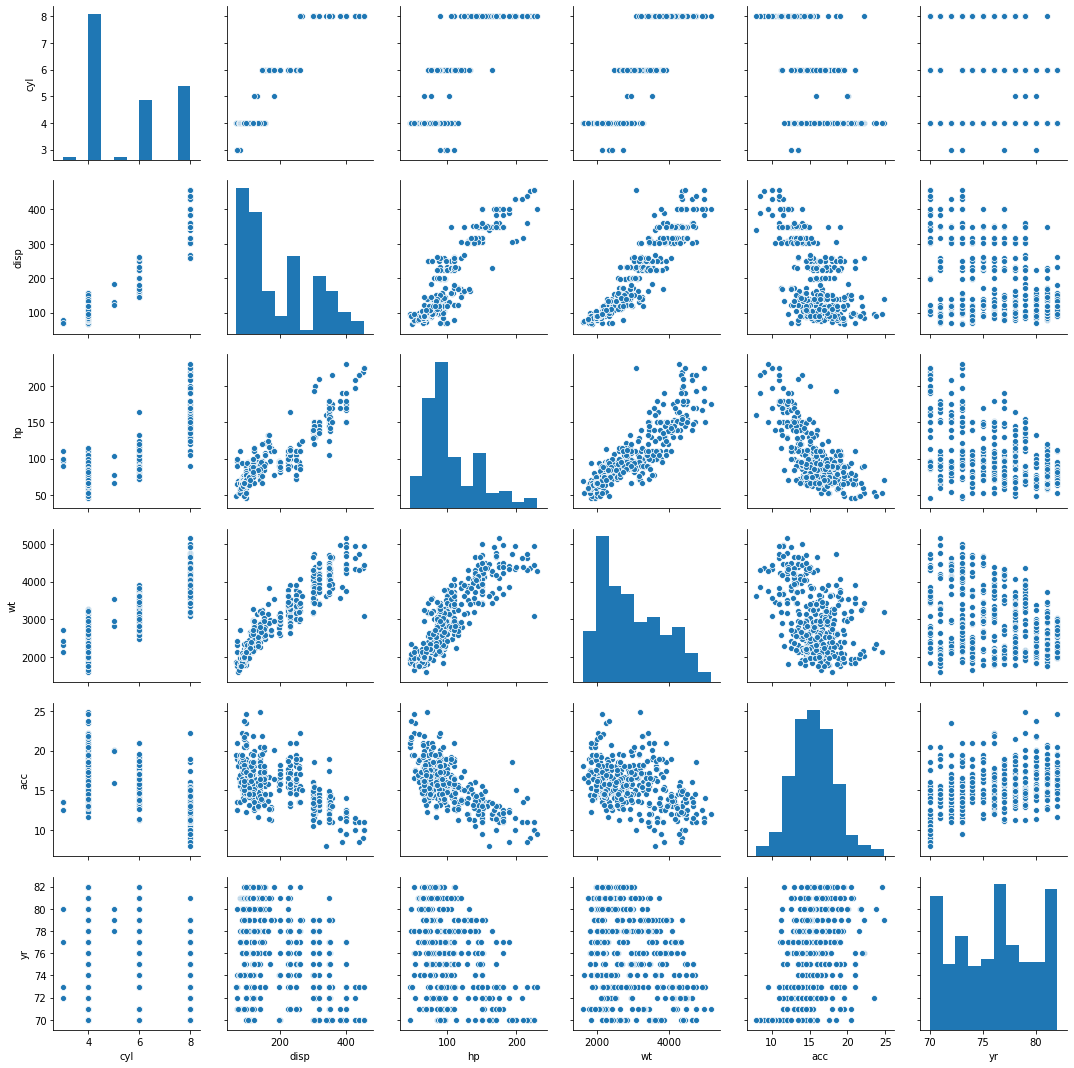

In [155]:
sns.pairplot(X)

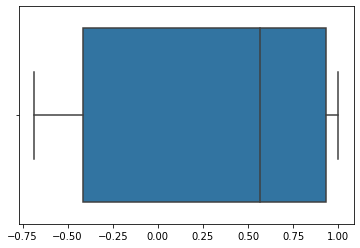

In [81]:
sns.boxplot(X.corr())

In [131]:
X.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')

In [158]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

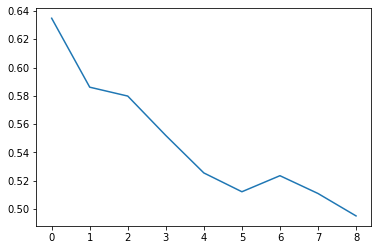

In [167]:
plt.plot(sil)

Text(0.5, 1.0, 'K-Means Classification')

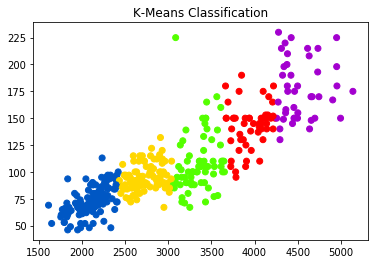

In [135]:
# plt.subplot(1,2,1)
# plt.scatter(X.wt,X.hp,c=y,cmap = 'prism')
# plt.title("Ground Truth Classification")
# plt.show

# plt.subplot(1,2,2)
plt.scatter(X.wt,X.hp,c=clustering.labels_,cmap = 'prism')
plt.title("K-Means Classification")
# plt.show

<function matplotlib.pyplot.show(*args, **kw)>

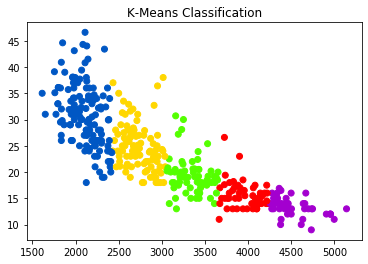

In [133]:
plt.scatter(X.wt,y,c=clustering.labels_,cmap = 'prism')
plt.title("K-Means Classification")
plt.show

In [179]:
# KMEANS Clustering
clustering = KMeans(n_clusters = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [180]:
clustering.labels_

array([4, 0, 4, 4, 4, 3, 3, 3, 3, 0, 4, 4, 0, 4, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 4, 4, 4, 4, 0, 3, 0, 0, 3, 3,
       3, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 0,
       0, 3, 3, 3, 3, 1, 0, 0, 3, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0,
       0, 0, 3, 3, 3, 0, 3, 3, 0, 4, 4, 2, 2, 2, 1, 3, 3, 3, 3, 2, 1, 1,
       1, 1, 1, 2, 1, 0, 3, 1, 1, 2, 2, 4, 2, 2, 0, 4, 2, 2, 4, 1, 2, 1,
       2, 0, 4, 4, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 4,
       4, 4, 3, 3, 3, 3, 0, 0, 0, 0, 2, 4, 4, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       4, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 4, 4, 2, 4, 1, 1, 1,
       1, 4, 4, 4, 4, 1, 1, 1, 2, 4, 0, 4, 2, 0, 3, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 3, 4, 4, 4, 4, 0, 0, 3, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 4, 0, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 4, 2, 4, 1, 1, 4, 2, 2, 4, 4, 0,
       0, 0, 0, 3, 0, 4, 0, 1, 1, 1, 2, 4, 0, 4, 4,

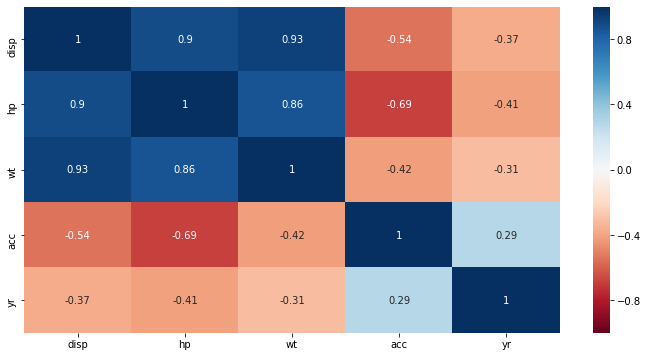

In [31]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

plt.figure(figsize=(12,6))

sns.heatmap(X.corr(),cmap='RdBu', annot=True, vmin=-1, vmax=1)

In [15]:
#Covariance matrix

np.round(np.cov(X))

array([[2289326., 2405720., 2238893., ..., 1500462., 1724485., 1788056.],
       [2405720., 2528261., 2352873., ..., 1576340., 1811525., 1878297.],
       [2238893., 2352873., 2189674., ..., 1467190., 1686137., 1748291.],
       ...,
       [1500462., 1576340., 1467190., ...,  984812., 1132228., 1174015.],
       [1724485., 1811525., 1686137., ..., 1132228., 1301920., 1349995.],
       [1788056., 1878297., 1748291., ..., 1174015., 1349995., 1399851.]])

In [16]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n', cov_matrix)


Covariance Matrix 
 [[ 1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [136]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.51351373  0.18723811 -0.21975447 -0.63655654  0.4977442 ]
 [ 0.52334892  0.0932243   0.04484184 -0.20710808 -0.82006743]
 [ 0.48851669  0.27100581 -0.39079961  0.71807022  0.13985032]
 [-0.38333754  0.04492322 -0.87141077 -0.18351115 -0.24083432]
 [-0.27715217  0.93850353  0.19394877 -0.05099836 -0.04669953]]

 Eigen Values 
%s [3.41457351 0.81236098 0.6485066  0.05291119 0.08424218]


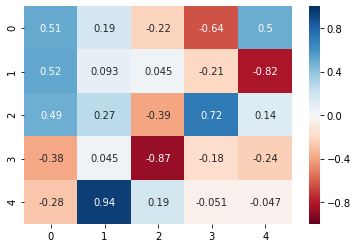

In [137]:
sns.heatmap(eig_vecs,annot=True,vmin=-1,vmax=1,cmap='RdBu')

In [140]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)

Variance Explained [68.11988351325772, 16.206397492201152, 12.937543715430955, 1.6806103579135276, 1.055564921196637]


In [141]:
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.11988351  84.32628101  97.26382472  98.94443508 100.        ]


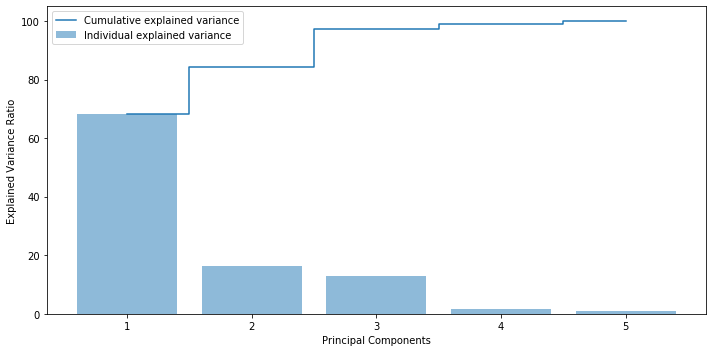

In [21]:
# Plotting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [142]:
# Splitting data into training set and test set for linear regression model which is a supervised method 
# Centralize the data with standard scalar

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)



In [143]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 6 to 4)
pcamodel = PCA(n_components=3)
X_train_reduced = pcamodel.fit_transform(X_train_std)
X_test_reduced = pcamodel.transform(X_test_std)

In [144]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train_reduced, y_train)

regression_model.coef_

array([-3.16616838,  1.48463658, -2.18328145])

In [145]:
regression_model.intercept_

23.600719424460433

In [146]:
regression_model.score(X_train_reduced, y_train)

0.7677089118437809

In [147]:
regression_model.score(X_test_reduced, y_test)

0.8061558815099984

In [152]:
regression_model2 = LinearRegression()

regression_model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
regression_model2.score(X_train, y_train)

0.79968038605472

In [151]:
regression_model2.score(X_test, y_test)

0.8268047501149659